In [38]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
A = np.random.rand(3,4)
# print(np.matmul(np.array(,range(4)),np.ones_like(A[0,:])))
Amean = np.mean(A,0)
A_mc = np.array([Acol - Amean for Acol in A])
print(np.mean(A_mc,0))

[ -3.70074342e-17   7.40148683e-17   7.40148683e-17   1.11022302e-16]


In [35]:
def test_fun(x):
    return 2*x

f = test_fun
f(2)

4

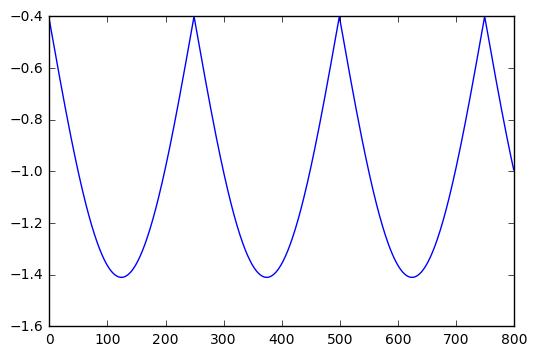

In [27]:
# voss.m function translated from schiff, ch5, p.110
dims_params = 1 # dq
dims_augmented_state, dims_observations = dims_params+2, 1 # dx, dy
fct = vossFNfct
obsfct = vossFNobsfct
num_samples = 800
dt_sample = 0.2
dt_integrate = dt_sample
steps_per_sample = dt_sample//dt_integrate

# Preallocate arrays
x0 = np.zeros((2,num_samples)) # true trajectory
xhat = np.zeros((dims_augmented_state,num_samples)) # estimated trajectory
Pxx = np.zeros((dims_augmented_state,dims_augmented_state,num_samples)) # covariance in x
errors = np.zeros((dims_augmented_state, num_samples))
Ks = np.zeros((dims_augmented_state,dims_observations,num_samples))

# Initial conditions
x0[:,0] = [0.,0.]

# External input current, estimated as parameter p later
Iext = np.arange(1,num_samples+1)/250.*2*np.pi
Iext = -0.4 - 1.01*(np.abs(np.sin(Iext/2.)))
# plt.plot(Iext)
# plt.show()

# RuKu4 integrator
for n in range(num_samples-1):
    x_temp = x0[:,n]
    for i in range(steps_per_sample):
        k1 = dt*vossFNint(x_temp,Iext[n])
        k2 = dt*vossFNint(x_temp+k1/2,Iext[n])
        k3 = dt*vossFNint(x_temp+k2/2,Iext[n])
        k4 = dt*vossFNint(x_temp+k3,Iext[n])
        x_temp += k1/6. + k2/3. + k3/3. + k4/6.
    x0[:,n+1] = x_temp
    
augmented_state = np.vstack((Iext,x0))
xhat[:,0] = augmented_state[:,0]

# Covariances
process_noise = 0.015
observation_noise = 0.2*0.2*np.var(vossFNobsfct(augmented_state))*np.eye(dims_observations)

noisy_data = obsfct(x) + np.matmul(la.sqrtm(observation_noise),
                                   np.random.randn((dims_observations,num_samples)))
Pxx[:,:,0] = la.block_diag(process_noise,observation_noise,observation_noise)

# Main loop for recursive estimation
for k in range(1,num_samples):
    xhat[:,k],Pxx[:,k],Ks[:,:,k] = voss_unscented_transform(xhat[:,k-1],Pxx[:,:,k-1],noisy_data[:,k]
                                         fct,obsfct,dims_params,dims_augmented_state,
                                         dims_observations, observation_noise)
    Pxx[0,0,k] = process_noise
    errors[:,k] = np.sqrt(np.diag(Pxx[:,:,k]))
    
# Results
chisq = np.mean((augmented_state[0,:]-xhat[0,:])**2 + (augmented_state[1,:]-xhat[1,:])**2 + 
               (augmented_state[2,:] - xhat[2,:])**2) # this can probably be simplified to mean((augmented_state - xhat)**2)
est = np.transpose(xhat[0:dims_params-1,-1])
error = np.transpose(errors[0:dims_params-1,-1])
meanest = np.mean(np.transpose(xhat[:dims_params-1,:]))
meanerror = np.mean(np.transpose(errors[:dims_params,:]))

# Plotting

In [47]:
# vossut function translated from matlab code in Schiff, ch 5, p.110

def voss_unscented_transform(xhat,Pxx,noisy_data,fct,obsfct,dims_params,dims_augmented_state,
           dims_observations,observation_noise):
    num_sigma_points = 2*dims_augmented_state 
    
    Pxx = symmetrize(Pxx)
    xsigma = np.linalg.cholesky(dims_augmented_state*Pxx)
    
    Xa = generate_sigma_points(xhat,xsigma,num_samples)
    X = fct(dims_params,Xa)
    
    xtilde = sum(np.transpose(X))/2
    X1 = np.array([Xcol - xtilde for Xcol in X])
    Pxx = np.matmul(X1*np.transpose(X1))/num_samples
    Pxx = symmetrize(Pxx)
    
    Y = obsfct(X)
    
    return xhat,Pxx,k
    
def symmetrize(A):
    '''Numerical safety'''
    return (A + np.transpose(A)) / 2

def generate_sigma_points(xhat,xsigma,N):
    return xhat*np.ones((1,N)) + np.hstack((xsigma,-xsigma))

In [79]:
def vossFNint(state,input_current):
    '''Check this... Returns derivative of voltage (state[0]) and recovery (state[1]) variables'''
    a, b, c = 0.7, 0.8, 3.
    return np.array([[c*(state[1]+state[0]-state[0]^3/3+input_current)],
                     [-(state[0]-a+b*state[1])/c]]);

In [ ]:
x = np.array([[0],[0]])
for i in range(100):
    

In [29]:
def vossFNobsfct(X):
    return

In [8]:
A = np.random.rand(3,3)
print(A)
print(np.transpose(A))

[[ 0.66014359  0.57504224  0.2511052 ]
 [ 0.08968374  0.72993851  0.3075679 ]
 [ 0.14402766  0.57898203  0.91737059]]
[[ 0.66014359  0.08968374  0.14402766]
 [ 0.57504224  0.72993851  0.57898203]
 [ 0.2511052   0.3075679   0.91737059]]
